In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
import gensim
from gensim.models.word2vec import Word2Vec

In [3]:
def tsnescatterplot(model, word, list_names,curr_pos):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0].replace('T','U'))
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd.replace('T','U'))
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
#     fig, ax = plt.subplot()
#     fig.set_size_inches(9, 9)
    ax = plt.subplot(1,4,curr_pos)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 },
                    ax=ax)
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line],
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(12)

    
    ax.set_xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    ax.set_ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    ax.set_title('t-SNE visualization for {}'.format(word))
    #plt.savefig('./Figs/t-SNE_visualization_for_{}'.format(word))
    return ax

In [4]:
model = Word2Vec.load('../Embeddings/Gen2vec')

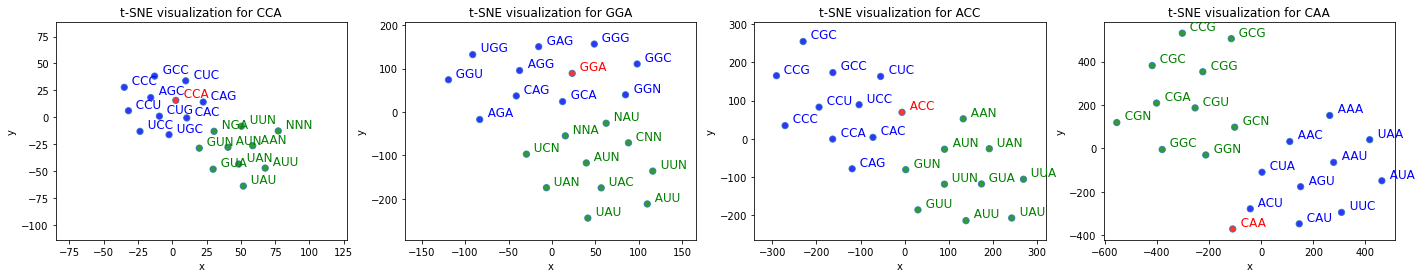

In [5]:
fig, axes = plt.subplots(1,4)
fig.set_size_inches(24, 4)
axes[0] = tsnescatterplot(model, 'CCA', [i[0] for i in model.wv.most_similar(negative=["CCA"])],1)
axes[1] = tsnescatterplot(model, 'GGA', [i[0] for i in model.wv.most_similar(negative=["GGA"])],2)
axes[2] = tsnescatterplot(model, 'ACC', [i[0] for i in model.wv.most_similar(negative=["ACC"])],3)
axes[3] = tsnescatterplot(model, 'CAA', [i[0] for i in model.wv.most_similar(negative=["CAA"])],4)